In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
y_test = y_test.reshape(y_test.shape[0], 1)

In [65]:
zoom_range=(1, 3) # define zoom range
# Create ImageDataGenerator training instance with data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   zoom_range=zoom_range, # zoom into the image
                                   width_shift_range=0.3, # shift the image width ways
                                   height_shift_range=0.3 ) # shift the image height ways

valid_datagen = ImageDataGenerator(rescale=1/255.)

In [66]:
train_datagen.fit(X_train.reshape(X_train.shape[0], 28, 28, 1))
valid_datagen.fit(X_test.reshape(X_test.shape[0], 28, 28, 1))

In [67]:
# define number of rows & columns
num_row = 2
num_col = 8
num = num_row*num_col

TRAIN:



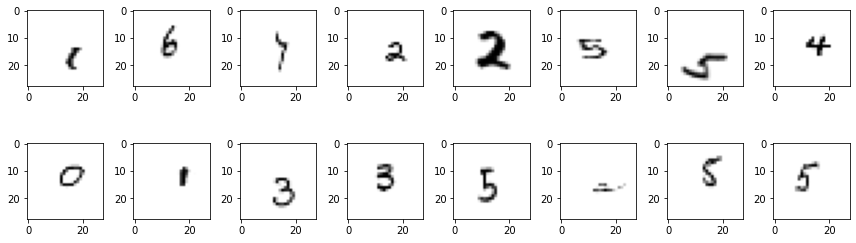

In [68]:
print('TRAIN:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in train_datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=True):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
     break
plt.tight_layout()
plt.show()

TEST:



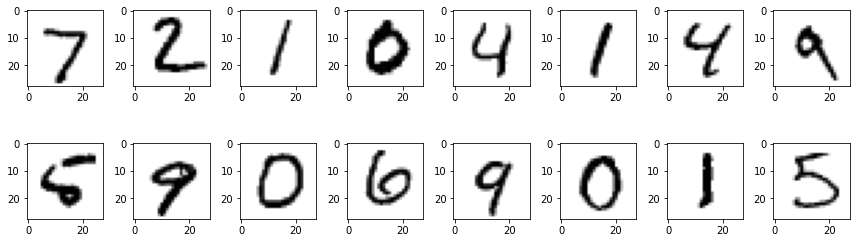

In [69]:
print('TEST:\n')
fig2, axes2 = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for X, Y in valid_datagen.flow(X_test.reshape(X_test.shape[0], 28, 28, 1),y_test.reshape(y_test.shape[0], 1),batch_size=num,shuffle=False):
     for i in range(0, num):
          ax = axes2[i//num_col, i%num_col]
          ax.imshow(X[i].reshape(28,28), cmap='gray_r')
     break
plt.tight_layout()
plt.show()

In [75]:
X_train_aug = train_datagen.flow(X_train.reshape(X_train.shape[0], 28, 28, 1),y_train.reshape(y_train.shape[0], 1),batch_size=num,shuffle=True, class_mode="categorical")
X_test_aug = train_datagen.flow(X_test.reshape(X_test.shape[0], 28, 28, 1), y_test.reshape(y_test.shape[0], 1),batch_size=num,shuffle=False, class_mode="categorical")

TypeError: flow() got an unexpected keyword argument 'class_mode'

In [77]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1))),
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

SyntaxError: invalid syntax (1034030600.py, line 6)

In [72]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 12544)             0         
                                                                 
 dense_12 (Dense)            (None, 128)               1605760   
                                                      

In [74]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss="categorical_crossentropy",
              metrics=['accuracy'])


history = model.fit(X_train_aug, epochs=10, batch_size=256, validation_data=X_test_aug)


Epoch 1/10
3750/3750 [==============================] - 54s 14ms/step - loss: 27545997312.0000 - accuracy: 0.1165 - val_loss: 54370983936.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
3750/3750 [==============================] - 53s 14ms/step - loss: 251466186752.0000 - accuracy: 0.1301 - val_loss: 237027622912.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
3750/3750 [==============================] - 51s 14ms/step - loss: 764433661952.0000 - accuracy: 0.1307 - val_loss: 516384653312.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
3750/3750 [==============================] - 53s 14ms/step - loss: 1610562011136.0000 - accuracy: 0.1312 - val_loss: 944034349056.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
 405/3750 [==>...........................] - ETA: 45s - loss: 2208092389376.0000 - accuracy: 0.1321

KeyboardInterrupt: 

Text(0.5, 0, 'epochs')

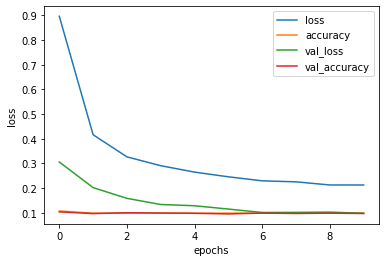

In [47]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0345 - accuracy: 0.9898


[0.03452508896589279, 0.989799976348877]

In [ ]:
model.save("model.h5")